In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [2]:
import pandas as pd

TRAINING_DIR = '../data/training'

X, y, positions, file_names = get_data(
    TRAINING_DIR)

In [4]:
import math
WORDS_FILE='../data/external/common_words/google-books-common-words.txt'
word_class = {}
with open(WORDS_FILE) as f:
    for line in f:
        (key, val) = line.split()
        word_class[key.lower()] = math.log2(53097401461/float(val))

In [7]:
word_class

{'arms': 9.357274079762636,
 'zealand': 11.787663969838292,
 'microsystems': 17.151567577488912,
 'happy': 9.809698682164724,
 'gloucestershire': 16.053328680097245,
 'outsourcing': 15.415299960492398,
 'sphenoid': 16.486957669491048,
 'dysregulation': 18.563884713723965,
 'colonie': 18.242843433712963,
 'zhuan': 18.971804642322535,
 'meanderings': 18.84046596925255,
 'tattoos': 16.719403511169727,
 'ischia': 18.172707380945617,
 'ramos': 15.765405918919452,
 'sabina': 16.715895411471745,
 'freethinker': 18.29112801596262,
 'irrigated': 14.162603922678425,
 'salm': 18.240123630778783,
 'luella': 18.590718466282883,
 'theorizes': 18.613324129440514,
 'harpo': 18.555234795037162,
 'paraprofessionals': 17.881165165716922,
 'saving': 11.345607052637174,
 'rhodopsin': 17.266316776313612,
 'compilation': 13.652399214274427,
 'thrilling': 14.534435651396459,
 'ergebnis': 18.88486287855279,
 'cvi': 18.06411520759044,
 'quadrants': 16.207729634215113,
 'frown': 14.448460142298586,
 'nnd': 16.24

In [33]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re

words, docs, classes = [], [], []
for d in X:
    for w in word_tokenize(d):
        w=re.sub('[^a-zA-Z]+', '', w)
        if w:
            docs.append(d)
            words.append(w)
            classes.append(word_class.get(w.lower(),20))

print(len(words))
print(len(docs))
df = pd.DataFrame(data={'word':words, 'class': classes, 'doc': docs})

2221129
2221129


In [ ]:
2572624

In [34]:
df.head()

,class,doc,word
0,6.722499,Make up some more tasks and add them to the qu...,Make
1,5.766489,Make up some more tasks and add them to the qu...,up
2,5.488951,Make up some more tasks and add them to the qu...,some
3,5.100862,Make up some more tasks and add them to the qu...,more
4,10.762462,Make up some more tasks and add them to the qu...,tasks


In [35]:
df['class'].describe()

count    2.221129e+06
mean     6.871535e+00
std      4.556416e+00
min      0.000000e+00
25%      3.356838e+00
50%      6.464503e+00
75%      9.878689e+00
max      2.000000e+01
Name: class, dtype: float64

In [36]:
df[df['class']==20]

,class,doc,word
26,20.0,Make up some more tasks and add them to the qu...,JavaDocs
46,20.0,Make up some more tasks and add them to the qu...,recode
112,20.0,Make up some more tasks and add them to the qu...,tweaks
210,20.0,Make up some more tasks and add them to the qu...,substantually
212,20.0,Make up some more tasks and add them to the qu...,quanity
234,20.0,Make up some more tasks and add them to the qu...,JavaDocs
305,20.0,Make up some more tasks and add them to the qu...,ImagegetScaledInstance
323,20.0,Make up some more tasks and add them to the qu...,andor
325,20.0,Make up some more tasks and add them to the qu...,sideeffects
335,20.0,Make up some more tasks and add them to the qu...,Lawrey


In [37]:
averages = []
for d in X:
    sum = 0
    word_count = 0
    for w in word_tokenize(d):
        w=re.sub('[^a-zA-Z]+', '', w)
        if w:  
            word_count+=1
            sum += word_class.get(w.lower(),20)
    averages.append(sum/word_count)
            
df_doc = pd.DataFrame(data={'text': X, 'label': y, 'average_class': averages})

In [38]:
df_doc.head()

,average_class,label,text
0,6.855036,True,Make up some more tasks and add them to the qu...
1,7.169665,False,"Yes, there were extensive rapes by American so..."
2,6.940552,False,Observers highlight key things that are occurr...
3,6.915030,False,TL;DR Much of Scrum's value to an organization...
4,8.310207,False,Origen believed (Contra Celsum 8) that while C...


In [39]:
df_doc.average_class.describe()

count    2980.000000
mean        6.879385
std         0.389519
min         5.814864
25%         6.613193
50%         6.847632
75%         7.101263
max        11.174390
Name: average_class, dtype: float64

<Figure size 432x288 with 0 Axes>

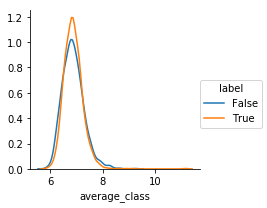

In [40]:
names=['average_class']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for name in names:
    plt.figure()
    sns.FacetGrid(df_doc, hue="label") \
       .map(sns.kdeplot, name) \
       .add_legend()

In [8]:
from nltk.tokenize import word_tokenize
import re

transformed = []

for doc in X[:10]:
    class_sum = 0
    word_count = 0
    uncommon = 0
    for w in word_tokenize(doc):
        w = re.sub('[^a-zA-Z]+', '', w)
        if w:  
            word_count+=1
            w_class = word_class.get(w.lower(), 20)
            if w_class == 20:
                uncommon += 1
            class_sum += w_class

    transformed.append([class_sum/word_count, uncommon/word_count])
transformed

[[7.1883664261615845, 0.015108593012275733],
 [6.833727924661486, 0.011714589989350373],
 [6.619814206422952, 0.0045871559633027525],
 [7.240924488667447, 0.017486338797814208],
 [6.539120467538563, 0.004826254826254826],
 [6.825621722706537, 0.001466275659824047],
 [6.899183493768452, 0.020172910662824207],
 [7.1482479462248945, 0.02627939142461964],
 [6.518626771634091, 0.005859375],
 [6.937513302015205, 0.016683022571148183]]